In [1]:
import pickle

with open('aggregator/aggregated_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv('worker/cic-ids-2017(10).csv')

normal_traffic = dataset.loc[dataset['Attack Type'] == 'BENIGN']
intrusions = dataset.loc[dataset['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n=len(intrusions), replace=False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n=15000)

X = bc_data.drop('Attack Type', axis=1)
y = bc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

              precision    recall  f1-score   support

           0     0.9952    1.0000    0.9976      1862
           1     1.0000    0.9952    0.9976      1888

    accuracy                         0.9976      3750
   macro avg     0.9976    0.9976    0.9976      3750
weighted avg     0.9976    0.9976    0.9976      3750



[Text(50.722222222222214, 0.5, 'True Value')]

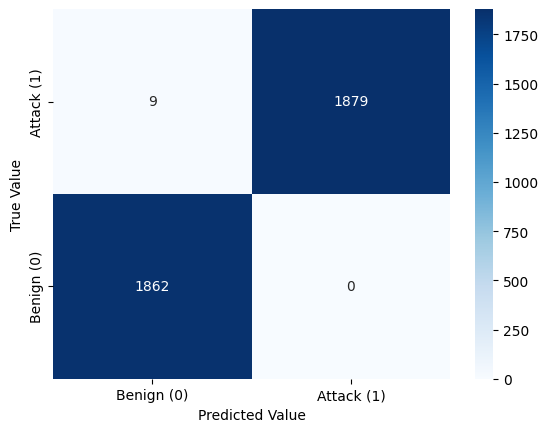

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate classification report
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

matrix_reversed = matrix[::-1]

print(report)

classes = ['Attack (1)', 'Benign (0)']
map = sns.heatmap(matrix_reversed, annot=True, cmap='Blues', fmt='g', xticklabels=classes[::-1], yticklabels=classes)
map.set(xlabel='Predicted Value')
map.set(ylabel='True Value')